# Project 4: Interest Point detection via Harris

The goal of this project is to implement the Harris Feature detector (described in lecture, in the textbook, and and in readings).

In each case, write your algorithm code in `project4.py`, and only use this notebook for testing.

## Part 1: Harris Feature Detector

Recall that the steps of Harris detection are, in a nutshell:

* Calculate the x derivative $I_{x}$ and the y  derivative $I_{y}$ of the image using a simple Sobel (3x3 window)
* Given those new derivative values (which are 2D arrays just like your image, calculate three new arrays: 
    * $I_{xx} = I_{x} * I_{x}$
    * $I_{xy} = I_{x} * I_{y}$
    * $I_{yy} = I_{y} * I_{y}$
    * (hint: these are very simple)
* Convolve each image above with a gaussian kernel (window 5), to produce new arrays 
    * $\langle I_{xx} \rangle$
    * $\langle I_{xy} \rangle$
    * $\langle I_{yy} \rangle$
* Now ,for every coordinate in your image, calculate the following structure tensor:

$
\begin{bmatrix}
\langle I_{xx} \rangle & \langle I_{xy} \rangle \\
\langle I_{yx} \rangle & \langle I_{yy} \rangle \\
\end{bmatrix}
$

* Now, for each pixel in your output image (same dimensions as your input image),  calculate:

$ R = Det(A) - k*Trace(A)^{2} $


(use k = 0.04)

* once you have your array of R values, threshold them to only keep values within 1% of the max R in your image.



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


### Harris Testing 

* This code will find interest points on the sample image from the slides and then draw red dots on top of the interest points. 

538 values
7.560105 seconds


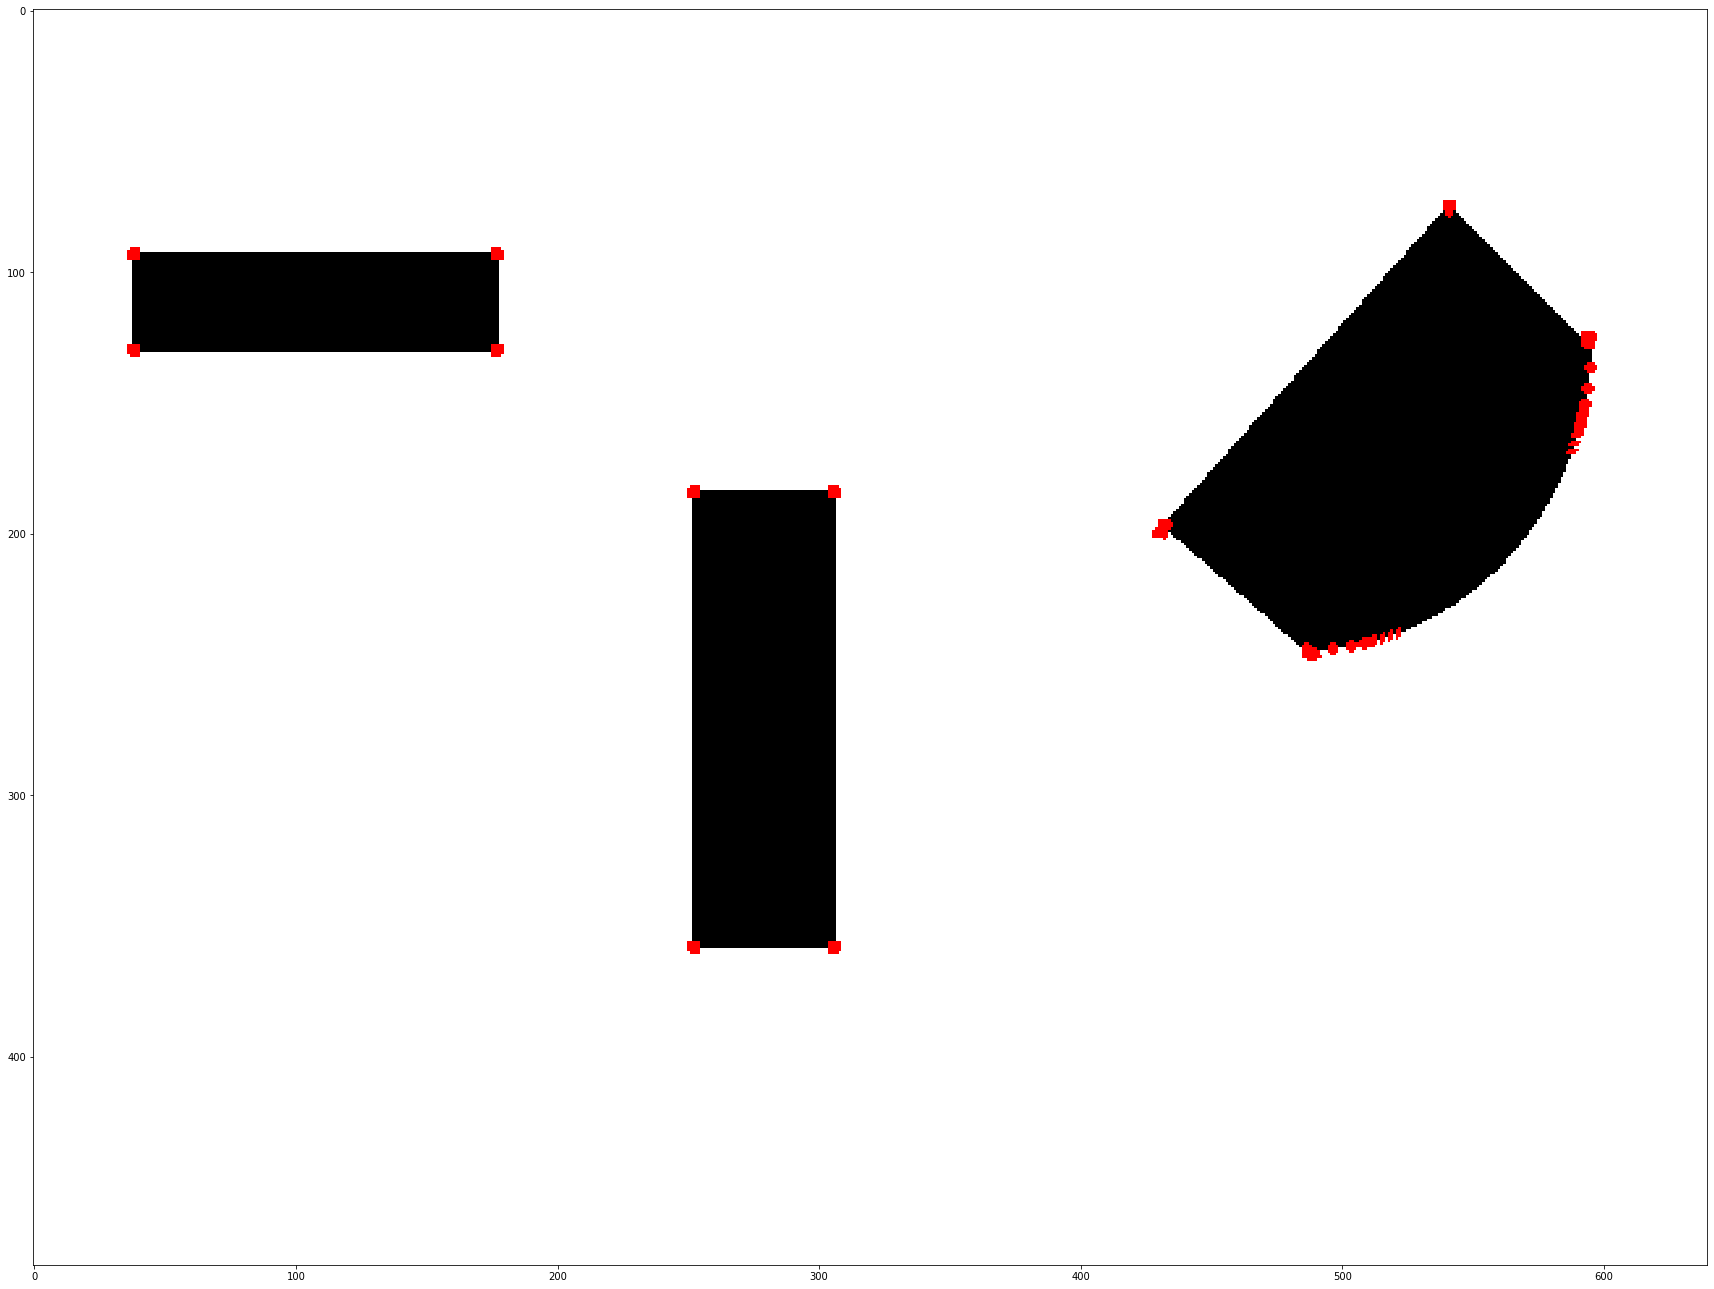

In [2]:
from project4 import *
import time

plt.rcParams["figure.figsize"] = (30,40)

img = cv2.imread('testimage.pgm')
t = time.time()
Responses = HarrisDetector(img)
t = time.time() - t
img[Responses>0.01*Responses.max()]=[255,0,0]

print(str(np.count_nonzero(np.where(Responses > 0.01*Responses.max(), Responses, 0))) + ' values')

print('{:f} seconds'.format(t))
plt.imshow(img)  

## Part 2: non-maximal suppression 

The results of your harris detector probably found way too many features, even for a simple test image.  To reduce the number, use the non-maximal suppression algorithm described in lecture, slides, and in the comments of `project4.py`.

The idea is to only detect features that are both local maxima and whose response value is significantly (10%)   greater than that of all of its neighbors within a radius r.

0.742012 seconds


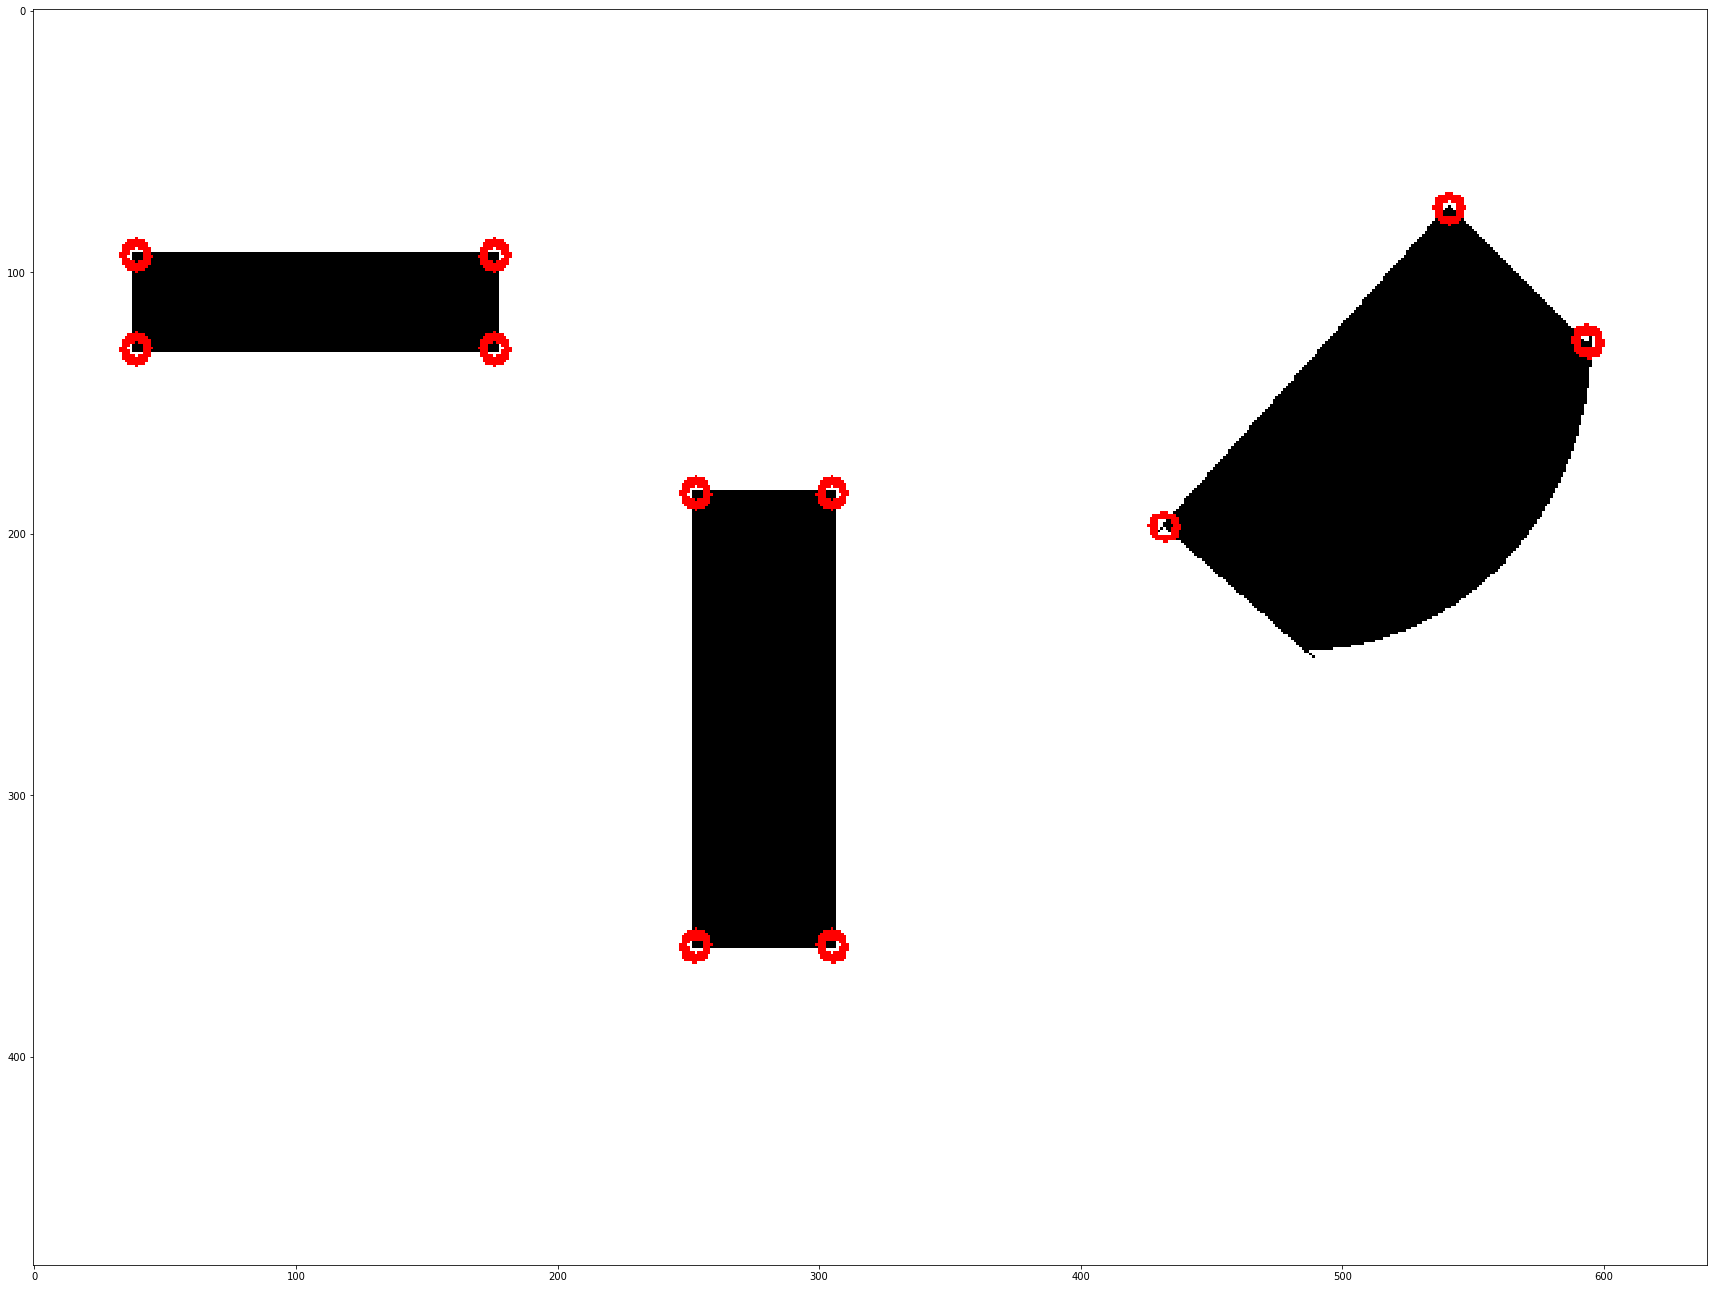

In [11]:
img = cv2.imread('testimage.pgm')
t = time.time()
x_vals, y_vals = SuppressNonMax(Responses, 20)
t = time.time() - t
print('{:f} seconds'.format(t))
for i in range(len(x_vals)):
    cv2.circle(img, ( int(y_vals[i]), int(x_vals[i]) ), 5, (255, 0, 0), 1)
    #img[int(x_vals[i])][int(y_vals[i])] = (255,0,0)

plt.imshow(img)
